<a href="https://colab.research.google.com/github/livcitylit/tmp/blob/master/Copy_of_Copy_of_Titanic_start_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - final assignment! :) 

If you get stuck or have questions, don't hesitate to email livhelen.vage@citylit.ac.uk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn import preprocessing 

from IPython.core.display import Image, display

# 1. Importing and merging the data

Upload the two files either by running the below code, or by clicking on files to the left and upload them there as shown in class.  

In [ ]:
#Not using this, will add files as train(1).csv and final_test(1).csv
#from google.colab import files
#testfile, trainfile = files.upload()

In [ ]:
train_data = pd.read_csv("train(1).csv")
test_data = pd.read_csv("final_test(1).csv") 

In [ ]:
test = pd.read_csv("train(1).csv")
train = pd.read_csv("final_test(1).csv")

#adding a column to say whether the data is part of train or test, so we can split it later, 
#remember to remove that column berfore training by using pd.drop

test["istest"] = np.ones(len(test))
train["istest"] = np.zeros(len(train))

#this merges the two datasets. Check that it's correct! 
fulldata =pd.concat([train, test], sort = False)


In [ ]:
fulldata


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived,istest,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0.0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0.0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0.0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0.0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,1.0,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,1.0,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN,1.0,1.0


In [ ]:
fulldata['survived'].dtype

dtype('float64')

# 2 - Removing and dealing with NaNs 

In [ ]:
#finding the sum of missing values in each of the columuns 
#also, why is there one column called Survived, and one called survived? Can you fix this? 
fulldata.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            257
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          982
Embarked         2
survived       891
istest           0
Survived       363
dtype: int64

In [ ]:
#creating a new column with all survival data concatenated
fulldata['Surv'] = fulldata['survived'].astype(str) + fulldata['Survived'].astype(str)

In [ ]:
#replacing'nan+Value' with Value in column
fulldata['Surv'].replace(['0.0nan','nan0.0','1.0nan','nan1.0'],['0.0','0.0','1.0','1.0'],inplace=True)

In [ ]:
fulldata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived,istest,Survived,Surv
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0.0,NaN,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0.0,NaN,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0.0,NaN,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0.0,NaN,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,1.0,0.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,1.0,1.0,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,1.0,0.0,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN,1.0,1.0,1.0


In [ ]:
fulldata['Surv'].dtype

dtype('O')

In [ ]:
fulldata['Surv'].astype(float)

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Surv, Length: 1254, dtype: float64

In [ ]:
#now to drop the two original columns
fulldata = fulldata.drop(['Survived','survived'],1)

In [ ]:
#will also drop Cabin - lots of Na values. Not convinced they have a lot of predictive value (as we already have pclass, and don't know what part of the ship the cabins are in etc)
fulldata = fulldata.drop(['Cabin'],1)


KeyError: ignored

In [ ]:
#Question for you Liv - i have dropped another column, but the dataframe apparently now has 14 columns, when before it had 13. why is this?
#OK - i worked it out, and assigned the data frame using fulldata = fulldata.drop(['Survived','survived'],1), instead of just using the.drop like
#this: fulldata.drop(['Survived','survived'],1)

In [ ]:
fulldata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,istest,Surv
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1.0,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,1.0,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1.0,1.0


In [ ]:
fulldata.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            257
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
istest           0
Surv             0
dtype: int64

In [ ]:
#i will remove nulls for Fare and Embarked as they are small, but want to impute mean for age (not median)
#OK - as you'll see below i wasn't able to round-up the values, but will leave in as would like to understand why [24 below]

In [ ]:
#data_meanNan = fulldata[['Age']].apply(lambda x: x.fillna(x.mean()),axis=0)
data_medNan = fulldata[['Age']].apply(lambda x: x.fillna(x.median()),axis=0)

In [ ]:
#fulldata['Age'].dtype

In [ ]:
#as mean is not an integer, i need to round up to nearest whole number.
#for i in data_meanNan:
 # if i != 'Age':
  #  data_meanNan.astype(int)
    #i.round()
    #int(i)

#this did'nt work - tried 2 methods (astype(int)) and .round

In [ ]:
data_medNan

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


In [ ]:
data_medNan.isna().sum()

Age    0
dtype: int64

In [ ]:
fulldata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,istest,Surv
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1.0,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,1.0,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1.0,1.0


In [ ]:
# you can drop all Nas: 

data_woNan = fulldata.dropna(axis=1)
#don't think Name and Ticket have predictive value
data_woNan = data_woNan.drop(['Name','Ticket'],1)

In [ ]:
data_woNan

,PassengerId,Pclass,Sex,SibSp,Parch,istest,Surv
0,892,3,male,0,0,0.0,0.0
1,893,3,female,1,0,0.0,1.0
2,894,2,male,0,0,0.0,0.0
3,895,3,male,0,0,0.0,0.0
4,896,3,female,1,1,0.0,1.0
...,...,...,...,...,...,...,...
886,887,2,male,0,0,1.0,0.0
887,888,1,female,0,0,1.0,1.0
888,889,3,female,1,2,1.0,0.0
889,890,1,male,0,0,1.0,1.0


In [ ]:
#some visualisation


In [ ]:
# you can impute the median of each column  

#data_medNan = fulldata[['Age', 'survived']].apply(lambda x: x.fillna(x.median()),axis=0)

In [ ]:
data_woNan

,PassengerId,Pclass,Sex,SibSp,Parch,istest,Surv
0,892,3,male,0,0,0.0,0.0
1,893,3,female,1,0,0.0,1.0
2,894,2,male,0,0,0.0,0.0
3,895,3,male,0,0,0.0,0.0
4,896,3,female,1,1,0.0,1.0
...,...,...,...,...,...,...,...
886,887,2,male,0,0,1.0,0.0
887,888,1,female,0,0,1.0,1.0
888,889,3,female,1,2,1.0,0.0
889,890,1,male,0,0,1.0,1.0


In [ ]:
data_medNan

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


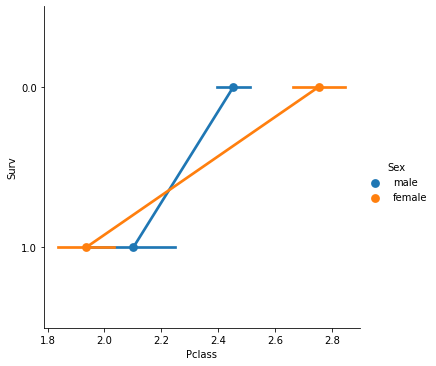

In [ ]:
sns.factorplot(x='Pclass',y='Surv',data=data_woNan,hue='Sex')

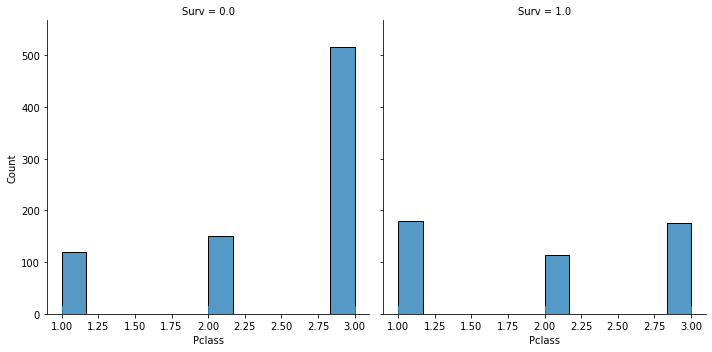

In [ ]:
#scale on x axis is not useful
sns.displot(data=data_woNan, x='Pclass',col='Surv',rug=True)

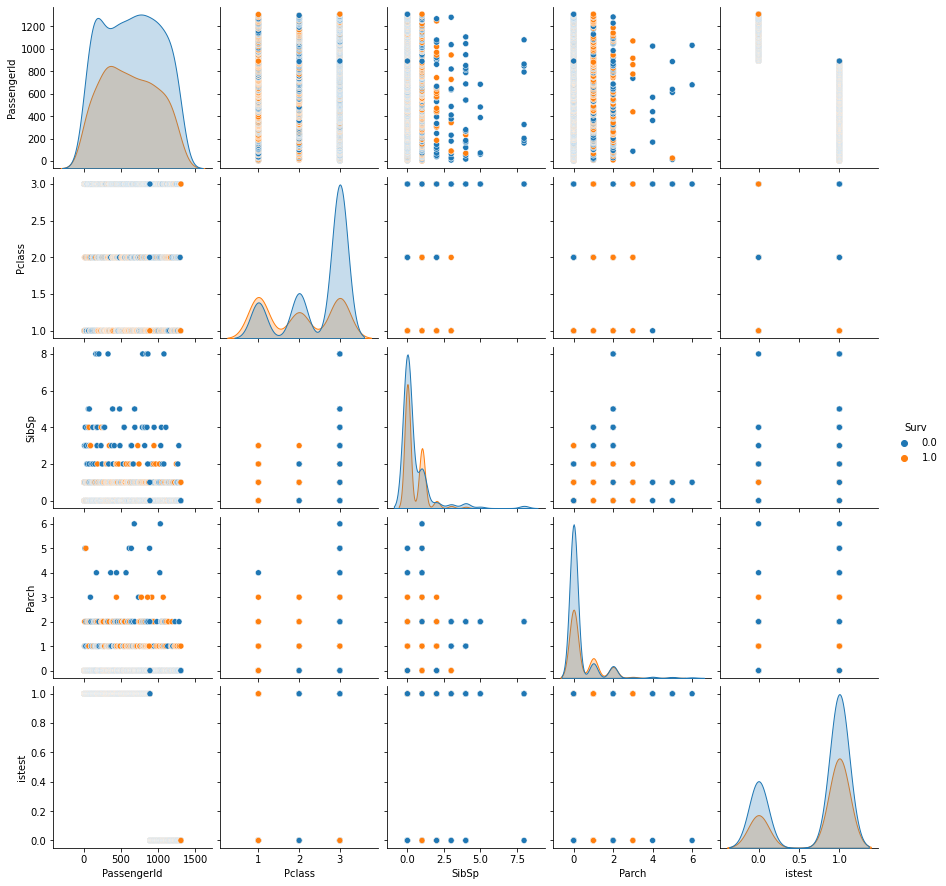

In [ ]:
#relationship of survival to all other numeric values (paired) in the dataset. This will be more interesting onece Sex is converted to binary value...
sns.pairplot(data=data_woNan,hue='Surv')

In [ ]:
data_woNan = str(data_woNan)
data_woNan = data_woNan['Sex'].replace(['male','female'],int([1,0,]))
#i'm trying here to replace string values with 1,0 so it can be plotted. Not sure why it hasn't worked.

TypeError: ignored

In [ ]:
data_woNan

In [ ]:
#also not sure how to correctly incorporate data_woNan into my full dataset. Below i was getting an error 
#when i tried to use the same structure as above (sns.pairplot(data=data_woNan,hue='Surv')), so had to use 'fulldata' to plot against survival
#after the unsuccessful attempt to replace the values...

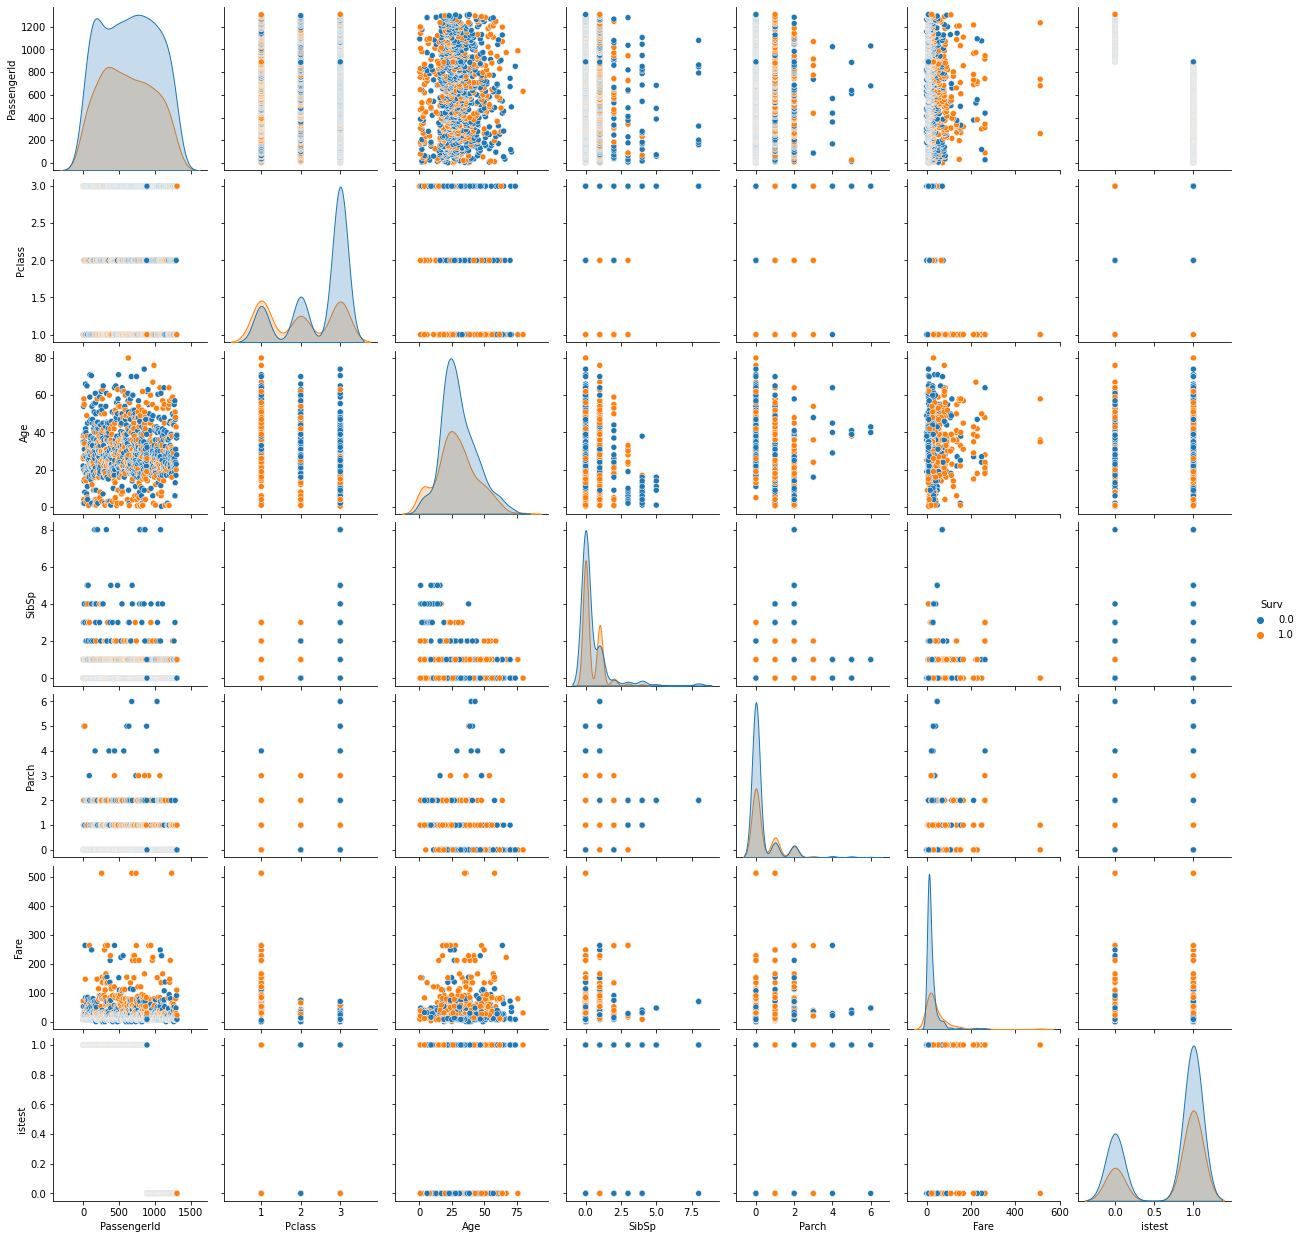

In [ ]:
sns.pairplot(data=fulldata,hue='Surv')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'colour'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'colour'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'colour'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'colour'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'colour'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'colour'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:

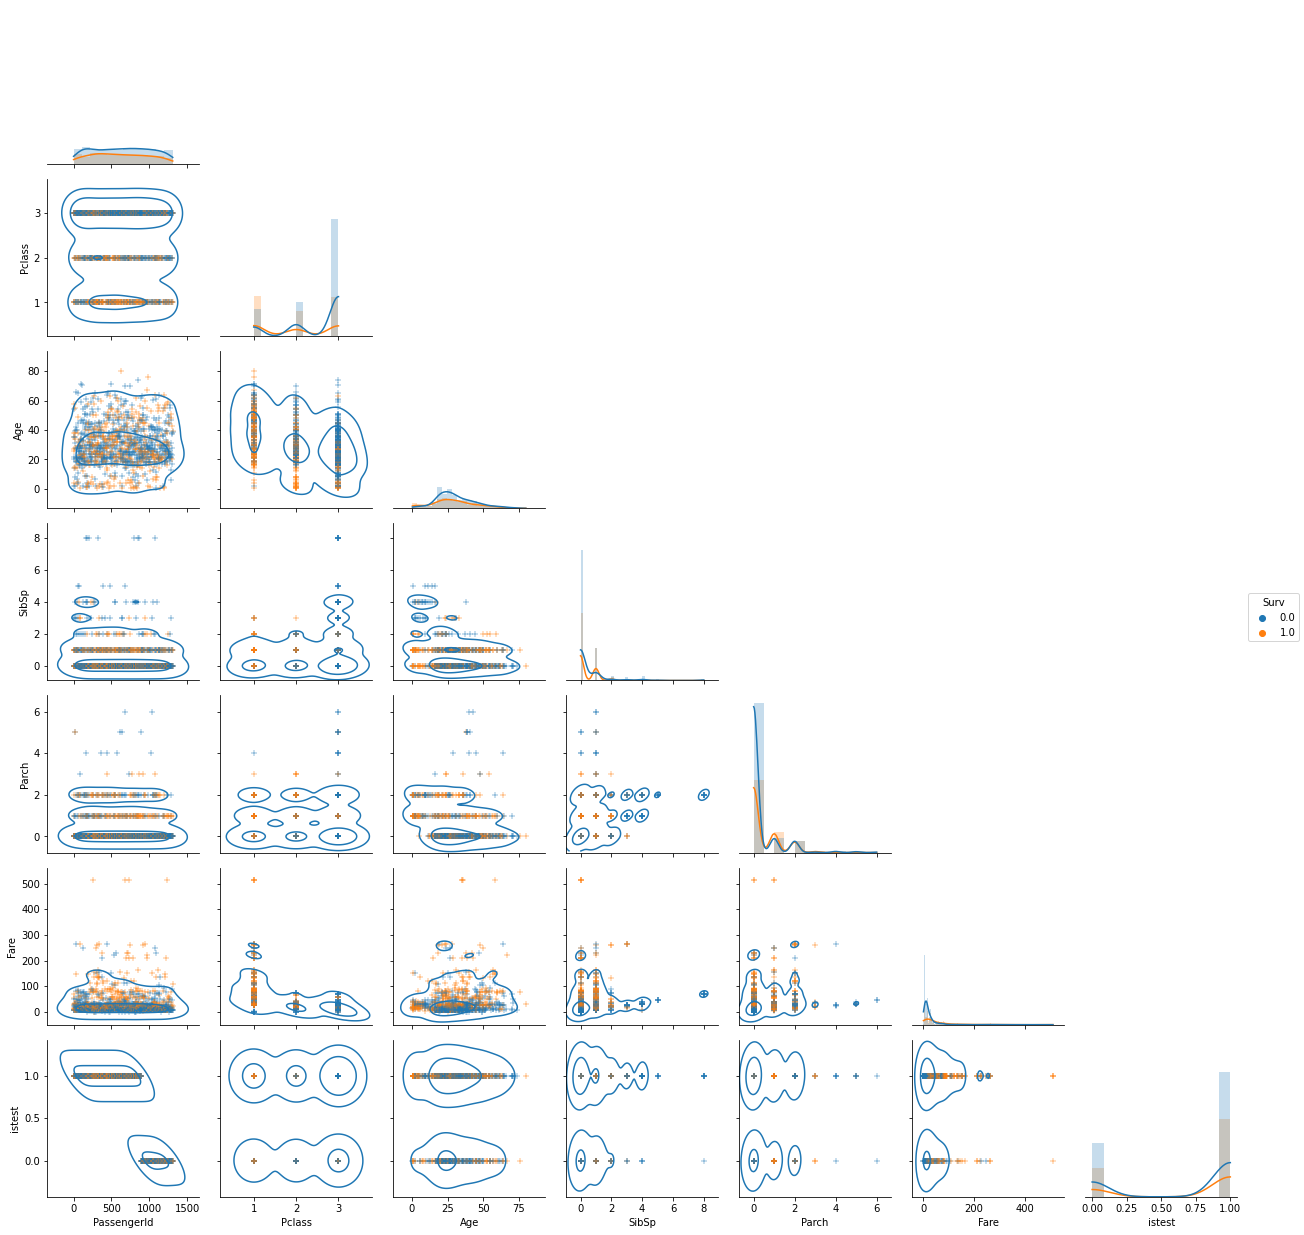

In [ ]:
g = sns.PairGrid(fulldata, hue='Surv',corner=True)
g.map_lower(sns.kdeplot,hue=None,levels=3,colour=".2")
g.map_lower(sns.scatterplot, marker='+')
g.map_diag(sns.histplot, element='step', linewidth=0, kde=True)
g.add_legend(frameon=True)

If you're feeling fancy, you can also impute the missing values by a prediction from the rest of the data frame - have a look here for some cool methods: 
https://scikit-learn.org/stable/modules/impute.html

# 3  - Encoding variables

In [ ]:
# panda has this neat function so you can select only certain data types from a panda 
data_objects = fulldata.select_dtypes(include="object")
data_objects

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [ ]:
#this will give us a summary, showing the number of unique vaues in each, and the top value
data_objects.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,1254,1254,1254,272,1252
unique,1252,2,929,178,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,815,8,5,877


In [ ]:
#hint: sex only has two values, so it's okay to encode it as ones and zeros
# you can use scikit learn's Label encoder for this

encoder = preprocessing.LabelEncoder()
gender_encoded = encoder.fit(np.unique(fulldata["Sex"]))
fulldata["Sex"] = gender_encoded.transform(fulldata["Sex"])
fulldata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived,istest,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.0,0.0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,1.0,0.0,NaN
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0.0,0.0,NaN
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0.0,0.0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,NaN,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,NaN,1.0,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,1.0,0.0
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,NaN,1.0,1.0


In [ ]:
# the others have more than two values, so you might want to do a one hot encoding, drop the columns or do something else 
# you can do a one hot encoding using something like; 
pd.get_dummies(fulldata["Embarked"])

# you can also encode it by how many times the value appears in the data frame, look up frequency encoding 


,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


# 4 -  Visualising data

Have fun with the visualisations! You can use seaborn or matplotlib, or both. Maybe some of the variables are not well distributed? Or even biased? Are there outliers? Maybe some variables are even not useful in a model. Test different hypothesis you might have for the data. 

# 5 - Feature engineering

Are some of the features useless in the prediciton, or all they all good? 
Could you do something to create better features?
This could include binning numbers into ranges, combining columns, getting data from somewhere else, etc. 
You might find some good ideas in the folder in google classroom. 

# 6 - Model building 

In [ ]:
# now split our data back into training and test, after you've done all your preprocessing 

final_test = fulldata[fulldata["istest"]==1].drop("istest", axis=1)
final_train = fulldata[fulldata["istest"]==0].drop("istest", axis=1)

#now remove your y value so that it is separate for both train and test 

In [ ]:
#now build your models - try linear regression, random forest, boosted decision tree, maybe a neural net 

# I recommend using gridsearchCV to use both cross validation and search for the best parameters! And example is given for random forest below
# you'll need to imput your own variables, then pick the best parameters from the results and then fit a new forest 

In [ ]:
forest = RandomForestRegressor()
#these are the parameters we want to try out
param_grid = param_grid = {'n_estimators': np.arange(1,20,5), 
                           'max_depth': np.arange(1,6,2)}

#here we specify the gridsearch, saying we want to try out what's in param_grid, with 3 cross validations
gscv = GridSearchCV(forest, param_grid, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)

means = gscv.cv_results_['mean_test_score']
stds = gscv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gscv.cv_results_['params']):
  print("%0.4f (+/-%0.04f) for %r"
    % (mean, std * 2, params))

When you do your linear regression, you'll likely want to scale your data first. Can you explain why? 

This can be done with something like the below. 



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

If you can, make a panda data frame showing your resutls from the different models. In any case:  

**Remember to print your highest accuracy on the test set**

In [ ]:

im = Image(url = "https://www.meme-arsenal.com/memes/a763a76098badd1f737d5c866423d4f3.jpg")
display(im)